## Name = Gauravraje Wagh
### Roll No. = DS24MS12

# Title: To Predict the Strength of Concrete 

#### Project Description: 
This project focuses on building a predictive model to estimate the compressive strength of 
concrete, a key indicator of its quality and durability. The dataset contains various quantitative 
attributes representing the composition of concrete mixtures, including the quantities of cement, 
blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, fine aggregate, and 
the age of the concrete in days. 
The main objective is to explore how these components influence the compressive strength of 
concrete (measured in MPa) and to develop a regression model that can accurately predict this 
value. Through exploratory data analysis (EDA), feature engineering, and model training, 
this project aims to provide insights into optimal concrete mix design for achieving high strength.


The main objective is to explore how these components influence the compressive strength of 
concrete (measured in MPa) and to develop a regression model that can accurately predict this 
value. Through exploratory data analysis (EDA), feature engineering, and model training, 
this project aims to provide insights into optimal concrete mix design for achieving high strength. 

## Importing Important Packages

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Loading Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/rahulinchal/SPPU/refs/heads/main/Data/concrete_Data.csv")
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


### Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


#### Finding Null Values

df.isnull().sum()

In [5]:
df1 = (df == 0).sum()
df1

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

In [6]:
df.duplicated().sum()

25

In [7]:
df.drop_duplicates(inplace=True)
print("Shape after dropping duplicates:", df.shape)

Shape after dropping duplicates: (1005, 9)


## Treating the Outliers

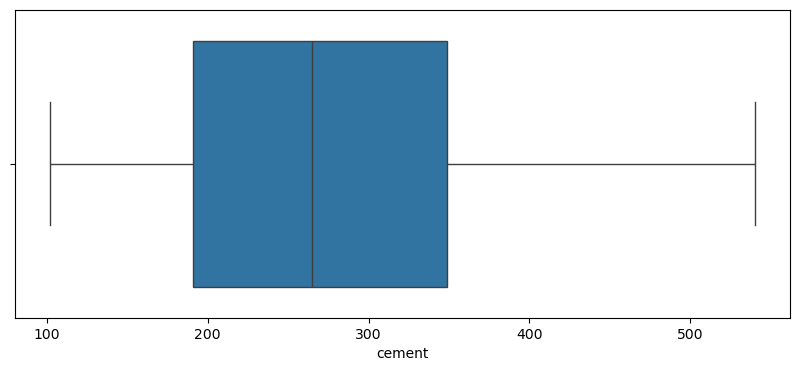

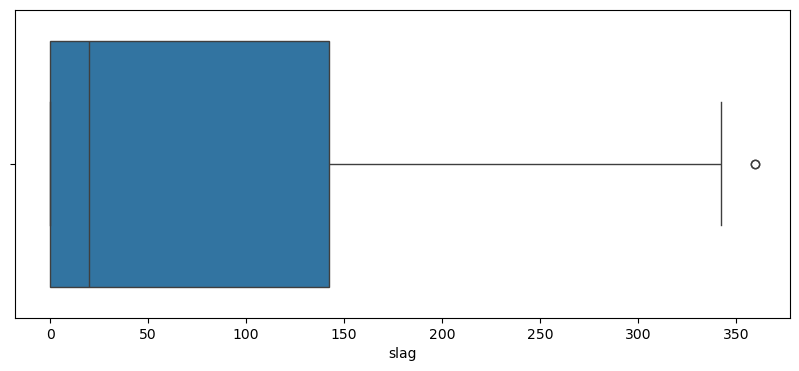

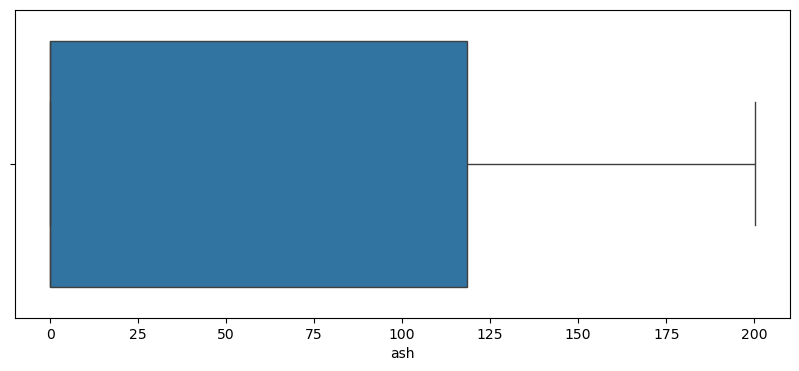

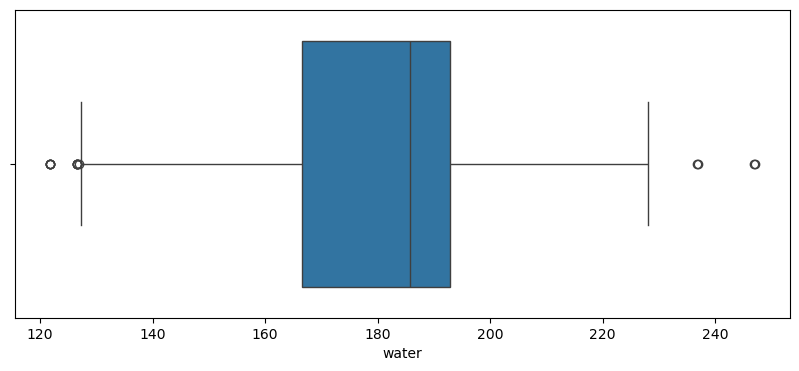

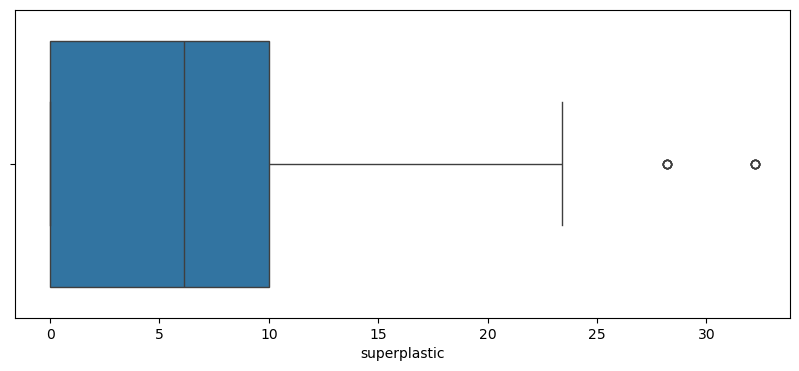

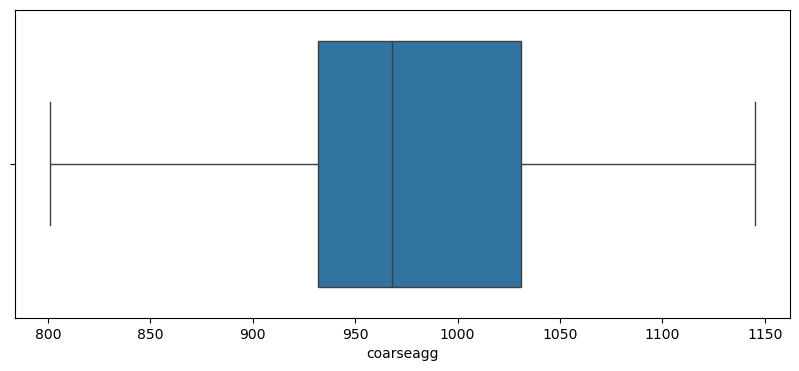

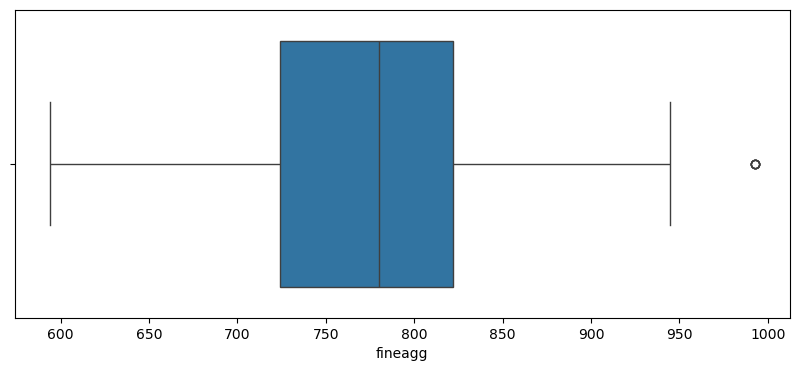

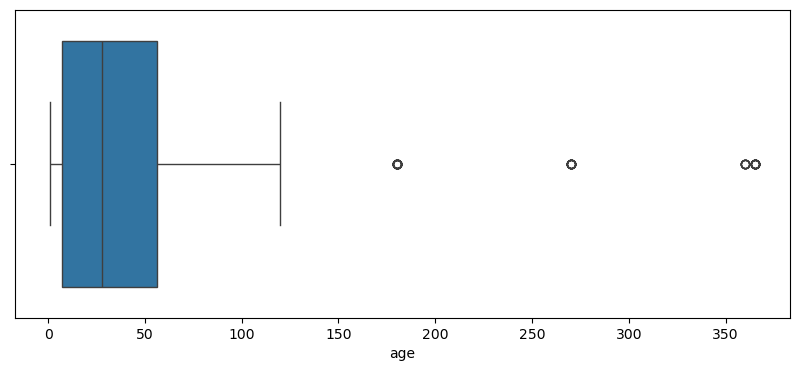

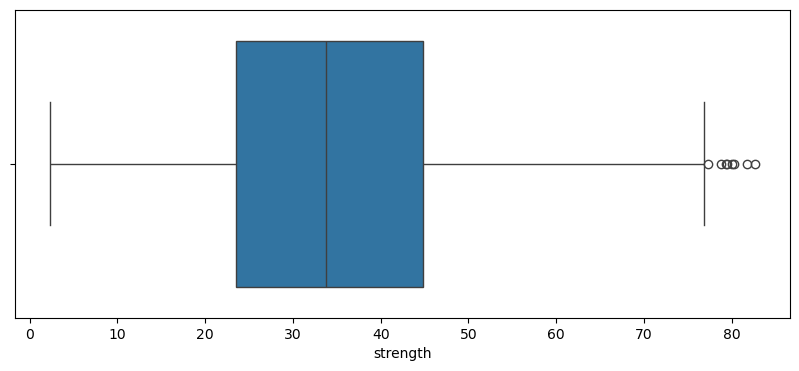

In [8]:
for i in df.columns:
    plt.figure(figsize = (10,4))
    sns.boxplot(x = df[i])
    plt.show()

In [9]:
df = df[df['age'] < 130]

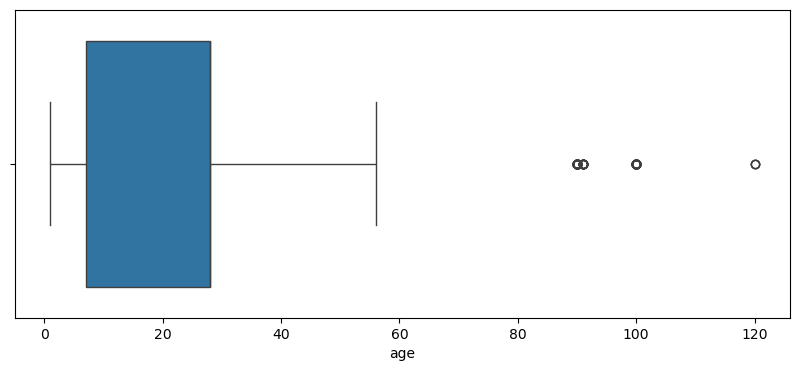

In [10]:
plt.figure(figsize = (10,4))
sns.boxplot(x = df.age)
plt.show()

### Checking distributions

In [11]:
# Calculate skewness and kurtosis for each column
from scipy.stats import skew, kurtosis
for col in df.columns:
    print(f"Column: {col}")
    print(f"  Skewness: {skew(df[col])}")
    print(f"  Kurtosis: {kurtosis(df[col])}\n")


Column: cement
  Skewness: 0.5912588964108267
  Kurtosis: -0.4146980919289338

Column: slag
  Skewness: 0.8423154188427432
  Kurtosis: -0.4269632266275125

Column: ash
  Skewness: 0.39613564765498466
  Kurtosis: -1.443732543228497

Column: water
  Skewness: -0.07174177742015954
  Kurtosis: 0.2444367130169569

Column: superplastic
  Skewness: 0.925564682180429
  Kurtosis: 1.7094703774763502

Column: coarseagg
  Skewness: -0.11530097836786392
  Kurtosis: -0.650803983574701

Column: fineagg
  Skewness: -0.19115812614611075
  Kurtosis: 0.031859411179425035

Column: age
  Skewness: 1.2467925572216223
  Kurtosis: 0.6038479142957698

Column: strength
  Skewness: 0.4502624854760438
  Kurtosis: -0.2870966886025448



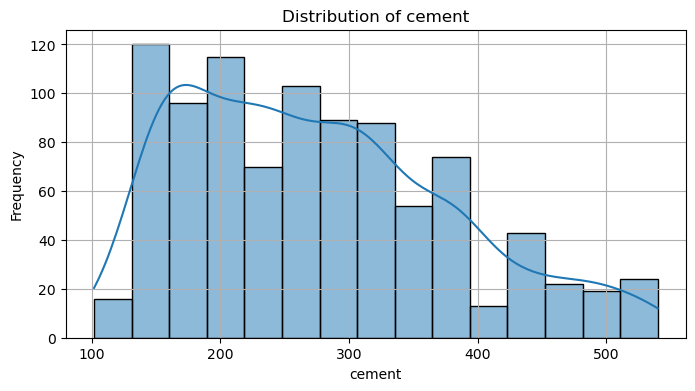

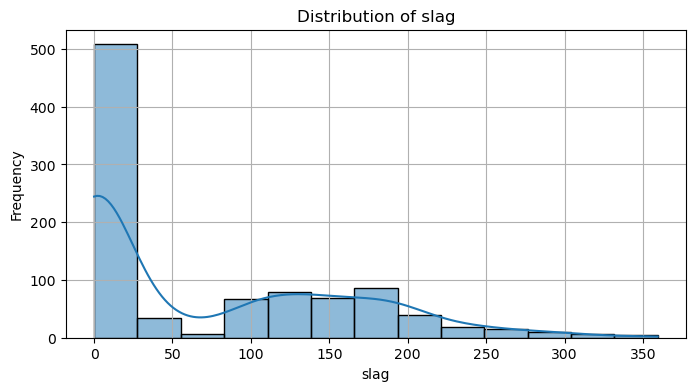

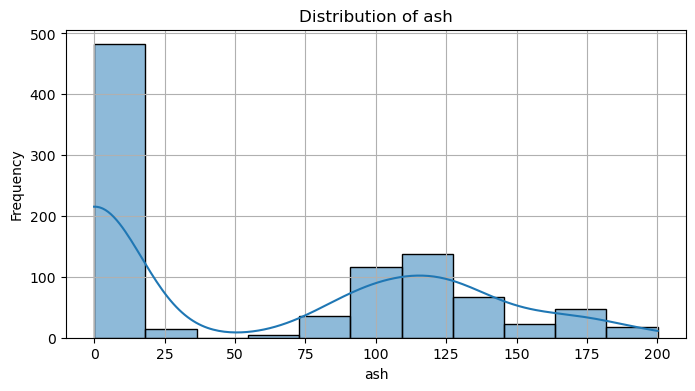

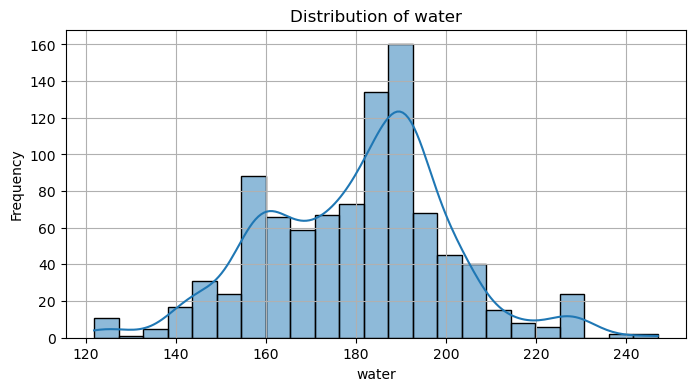

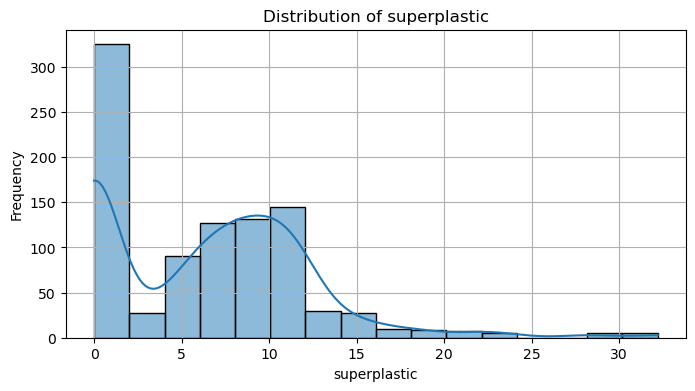

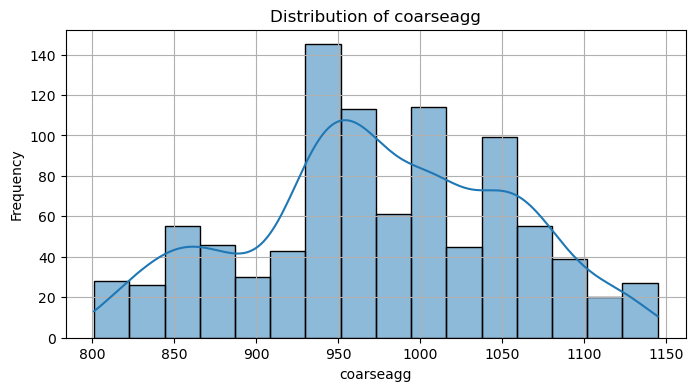

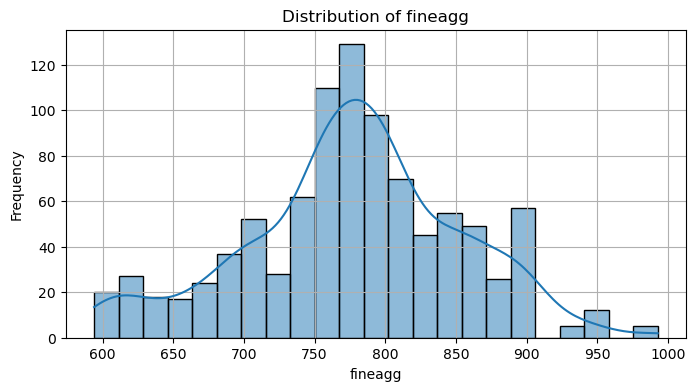

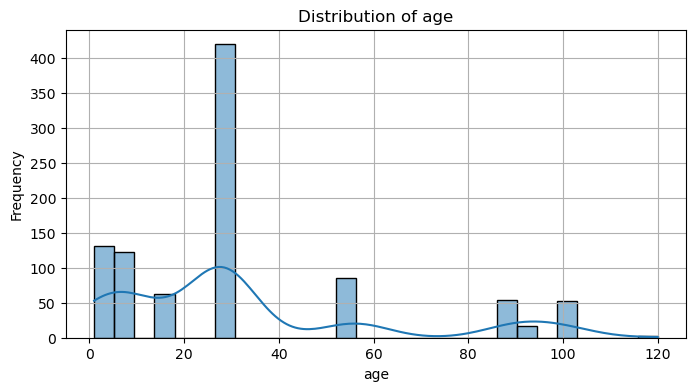

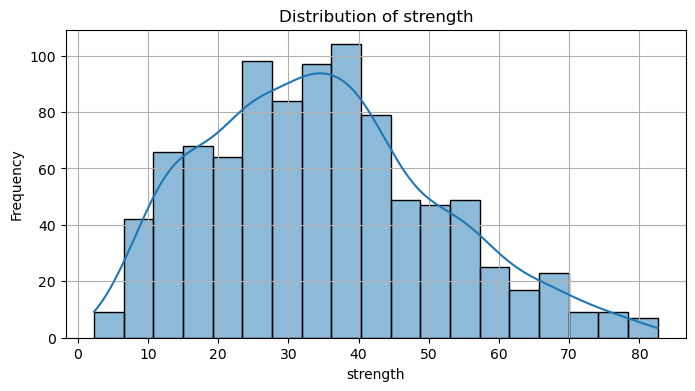

In [12]:
# Plot distributions
for col in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [13]:
x = df.drop(['strength'], axis = 1).values
y = df['strength'].values

### Splitting data into Train/Test Sets

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

### Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [18]:
y_pred = lr.predict(x_test_scaled)
y_pred

array([10.6842007 , 26.61158495, 39.26309847, 38.55630152, 68.55454057,
       33.19669105, 21.42626761, 11.65002005, 31.53112365, 17.53876682,
       29.97742163, 18.86281631, 45.23328823, 49.54298709, 24.243836  ,
        7.95634679, 54.60404647, 71.59353133, 22.32140446, 34.50507684,
       48.57416621, 17.02328125, 30.38005984, 34.7469425 , 15.21666798,
       42.38252174, 21.21926607, 40.77938343, 27.96666988, 16.56379044,
       21.84394058, 38.70879029, 40.87014212, 14.02437513, 31.97916948,
       15.11131346, 25.3383538 , 28.57458506, 30.3665328 , 20.61333388,
       15.5221223 , 52.75493084, 27.66645362, 42.1302198 , 22.81259178,
       52.06095652, 53.0404993 , 28.17573198, 34.59655447, 39.22773437,
       20.08902368, 34.41448672, 35.70975048, 40.6046012 , 34.75679535,
       32.14770701, 48.76199156, 46.37726367, 29.48375336, 25.30454253,
        9.66709615, 50.65182047, 35.75387839, 59.50132325, 22.88993594,
       17.88006112, 31.32003803,  9.87764204, 45.08585458, 24.29

In [19]:
print("Trainig Score: ",(lr.score(x_train_scaled, y_train))*100,"%")
print("Testing Score: ",(lr.score(x_test_scaled, y_test))*100,"%")

Trainig Score:  76.40637446946816 %
Testing Score:  71.17905251115695 %


In [20]:
print(lr.coef_)

[ 1.09905671e+01  7.35719465e+00  4.14582341e+00 -3.88109080e+00
  8.05233369e-01 -3.07004565e-01  6.36011953e-03  8.95123163e+00]


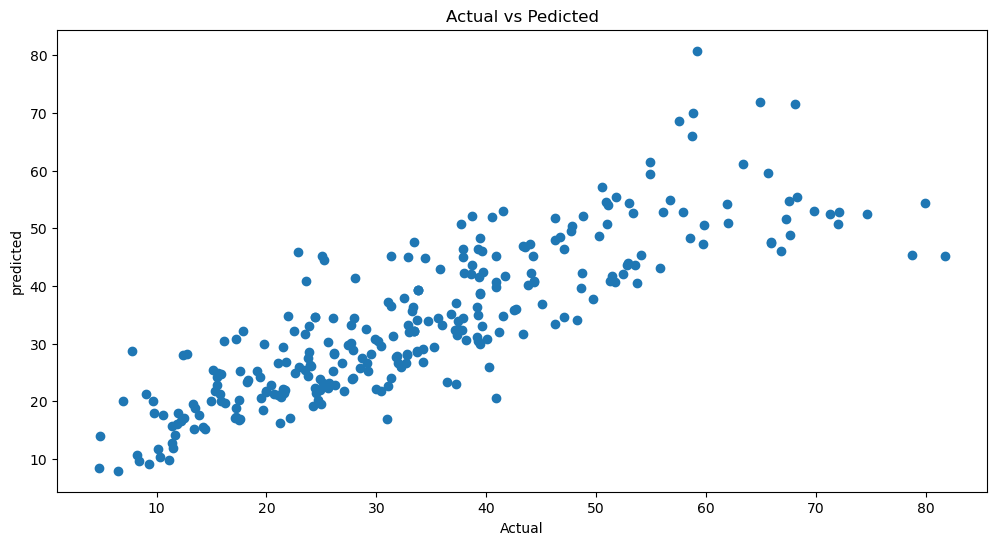

In [21]:
plt.figure(figsize = (12,6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Pedicted')
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.show()

In [22]:
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred.astype(int), 'Difference': y_test - y_pred})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
155,37.17,32,4.888458
189,26.14,28,-2.081442
114,4.78,8,-3.654892
47,32.77,28,4.594268
223,33.40,47,-14.142799
256,31.90,27,4.030938
126,19.69,18,1.198509
175,43.39,31,11.710962
164,17.24,17,-0.077383
120,32.96,32,0.909114


### Evaluation Metrics

In [23]:
# Importing Evaluation metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error
MSE = mean_squared_error(y_test, y_pred)
print("MSE :",MSE)

# Root mean Square error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R squared
r2 = r2_score(y_test, y_pred)
print("R2 Linear regression :" ,r2*100)

MSE : 76.67074274914361
RMSE : 8.75618311532734
R2 Linear regression : 71.17905251115695


## Decision Tree Regressor

In [24]:
# Importing the packages
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor(max_depth=14)

# Fitting the train model
decision_tree.fit(x_train, y_train)

# Predicting from the model 
DT_y_pred = decision_tree.predict(x_test)
DT_y_train = decision_tree.predict(x_train)

# Finding the error
MSE = mean_squared_error(y_test,DT_y_pred)
print("MSE:", MSE)

# Root mean squared error
RMSE = np.sqrt(MSE)
print("RMSE :" , RMSE)

# Adjusted r2
r2 = r2_score(y_test, DT_y_pred)
print("R2 for Decision Tree Regressor : ", r2*100)

MSE: 56.336138923513296
RMSE : 7.505740398089538
R2 for Decision Tree Regressor :  78.82294023221942


In [25]:
print("Trainig Score: ",(decision_tree.score(x_train, y_train))*100,"%")
print("Testing Score: ",(decision_tree.score(x_test, y_test))*100,"%")

Trainig Score:  99.81062718607005 %
Testing Score:  78.82294023221942 %


In [26]:
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': DT_y_pred, 'Difference': y_test - DT_y_pred})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
231,40.86,40.150000,0.710000
256,31.90,31.743333,0.156667
221,57.92,55.550000,2.370000
101,37.27,25.720000,11.550000
235,7.75,23.520000,-15.770000
69,23.79,23.790000,0.000000
218,39.16,23.890000,15.270000
124,19.11,14.700000,4.410000
21,17.17,14.913333,2.256667
239,25.73,23.890000,1.840000


## Random Forest Regressor

In [27]:
# Importing the model
from sklearn.ensemble import RandomForestRegressor

# Setting the hyperparameter values
random_forest = RandomForestRegressor(n_estimators = 20, max_depth=8)
random_forest.fit(x_train,y_train)
rf_y_pred = random_forest.predict(x_test)

# Mean squared error
MSE = mean_squared_error(y_test, rf_y_pred)
print("MSE :", MSE)

# Root mean squared error
RMSE = np.sqrt(MSE)
print("RMSE :", RMSE)

# Adjusted R2
r2 = r2_score(y_test, rf_y_pred)
print("R2 for Random Forest :", r2*100)

MSE : 37.852941144962436
RMSE : 6.152474392060681
R2 for Random Forest : 85.77087439198684


In [28]:
print("Trainig Score: ",(random_forest.score(x_train, y_train))*100,"%")
print("Testing Score: ",(random_forest.score(x_test, y_test))*100,"%")

Trainig Score:  96.41447081576196 %
Testing Score:  85.77087439198684 %


In [29]:
predicted_value = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': rf_y_pred, 'Difference': y_test - rf_y_pred})
predicted_value.sample(10)

,Actual Value,Predicted Value,Difference
219,33.72,36.982684,-3.262684
134,29.07,34.685982,-5.615982
202,46.23,45.158233,1.071767
35,14.40,11.331529,3.068471
260,17.20,16.193372,1.006628
114,4.78,9.000461,-4.220461
176,15.82,14.642783,1.177217
18,25.62,22.299164,3.320836
244,28.47,31.807657,-3.337657
14,19.42,14.972016,4.447984


## Gradient Boosting Regressor

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()

In [32]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [33]:
gbr.score(x_train, y_train)*100

94.9678884063271

In [34]:
gbr.score(x_test, y_test)*100

86.93033741398811

In [35]:
!pip install xgboost

## XG Boost Regressor

In [36]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [37]:
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [38]:
xgb.score(x_train, y_train)*100

99.79065949278618

In [39]:
xgb.score(x_test, y_test)*100

88.89705949870206

## Support Vector Regressor

In [80]:
from sklearn.svm import SVR

In [82]:
svr = SVR(kernel="linear")

In [84]:
svr.fit(x_train, y_train)

SVR(kernel='linear')

In [88]:
svr.score(x_train, y_train)*100

76.15682447103616

In [90]:
svr.score(x_test, y_test)*100

71.15252176725059

## Cross Value Score

In [92]:
from sklearn.model_selection import cross_val_score

In [94]:
cross_val_score(lr, x_train, y_train, cv = 5)

array([0.77760648, 0.68759219, 0.73363228, 0.7970062 , 0.75256985])

In [98]:
np.mean(cross_val_score(lr, x_train, y_train, cv = 5))*100

74.96814024072293

In [100]:
np.mean(cross_val_score(lr, x_test, y_test, cv = 5))*100

69.56087970876574

## Printing all the Accuracy Using DataFrame

In [104]:
overall_scores = pd.DataFrame({'Linear Regression': ((lr.score(x_train_scaled, y_train))*100, (lr.score(x_test_scaled, y_test))*100),
                              'Decision Tree Regressor': ((decision_tree.score(x_train, y_train))*100, (decision_tree.score(x_test, y_test))*100),
                              'Random Forest Regressor': ((random_forest.score(x_train, y_train))*100, (random_forest.score(x_test, y_test))*100),
                              'Gradient Boosting Regressor': ((gbr.score(x_train, y_train))*100, (gbr.score(x_test, y_test))*100),
                              'XGB Regressor' : ((xgb.score(x_train, y_train))*100,(xgb.score(x_test, y_test))*100),
                              'Support Vector Regressor' : ((svr.score(x_train, y_train))*100 , (svr.score(x_test, y_test))*100)                                               
                                                             })
overall_scores.T.rename(columns = {0:'Training Score', 1 : 'Test Score'})

,Training Score,Test Score
Linear Regression,76.406374,71.179053
Decision Tree Regressor,99.810627,78.822940
Random Forest Regressor,96.414471,85.770874
Gradient Boosting Regressor,94.967888,86.930337
XGB Regressor,99.790659,88.897059
Support Vector Regressor,76.156824,71.152522


## Obervations :

**Linear Regression**           : Basic linear model, limited performance. 

**Decision Tree Regressor**     : High train score,  likely overfitting

**Random Forest Regressor**     : Strong performance, good generalization.

**Gradient Boosting Regressor** : Even better! Boosting improved it.

**XGB Regressor**               : Shows best test accuracy among all models.

**Support Vector Regressor**    : Similar to Linear Regression, not great.